In [108]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from funciones_2 import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Detección de Fraude en Transacciones de Tarjetas de Crédito
El conjunto de datos de este problema comprende transacciones realizadas mediante tarjetas de crédito en un lapso de dos días, contabilizando 492 casos de fraude entre un total de 284,807 transacciones. Este dataset presenta un desequilibrio considerable, ya que la clase positiva (fraude) representa solo el 0.17 % del total de transacciones. Para una descripción más detallada del dataset, consulte el archivo credit card description.md.
En este problema, nuestro objetivo es desarrollar varios modelos para clasificar una transacción como fraudulenta o no, y luego evaluar la eficacia de cada uno. Para esto, el conjunto de datos se dividió previamente en uno de entrenamiento (credit card train.csv ), uno de validaci ́on (credit card valid.csv) y uno de testeo (credit card test.csv). Estos conjuntos permanecerán fijos durante el desarrollo de los modelos (es decir, en este problema tampoco aplicaremos validación cruzada). En caso de que sea necesario ajustar un hiperparámetro, esto se hará evaluando la métrica de performance sobre el conjunto de validación.

In [42]:
train = pd.read_csv('/Users/maxi/Downloads/Actuales/ML/ML-TP3/Data/2 - Detección de Fraude en Transacciones de Tarjetas de Crédito/credit_card_train.csv')
test = pd.read_csv('/Users/maxi/Downloads/Actuales/ML/ML-TP3/Data/2 - Detección de Fraude en Transacciones de Tarjetas de Crédito/credit_card_test.csv')
validation = pd.read_csv('/Users/maxi/Downloads/Actuales/ML/ML-TP3/Data/2 - Detección de Fraude en Transacciones de Tarjetas de Crédito/credit_card_valid.csv')

train = train.drop(columns=['Unnamed: 0'])
test = test.drop(columns=['Unnamed: 0'])
validation = validation.drop(columns=['Unnamed: 0'])
small_train = train.sample(frac=0.01, random_state=42)

# normalize all data
# min_max = get_min_max(train)
# train = min_max_normalize(train, min_max)
# test = min_max_normalize(test, min_max)
# validation = min_max_normalize(validation, min_max)

# if any column has a missing value replace with cero
# train = train.fillna(0)
# test = test.fillna(0)
# validation = validation.fillna(0)

X_train = train.drop(columns=['Class'])
y_train = train['Class'].values
min_max = get_min_max(X_train)
X_train = min_max_normalize(X_train, min_max)

X_test = test.drop(columns=['Class'])
X_test = min_max_normalize(X_test, min_max)
y_test = test['Class'].values

X_validation = validation.drop(columns=['Class'])
X_validation = min_max_normalize(X_validation, min_max)
y_validation = validation['Class'].values

X_small_train = small_train.drop(columns=['Class'])
min_max_small = get_min_max(X_small_train)
X_small_train = min_max_normalize(X_small_train, min_max_small)
y_small_train = small_train['Class'].values

small_test = test.sample(n=400, random_state=42)
X_small_test = small_test.drop(columns=['Class'])
X_small_test = min_max_normalize(X_small_test, min_max_small)
y_small_test = small_test['Class'].values


print("train shape: ", train.shape)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

print("\ntest shape: ", test.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

print("\nvalidation shape: ", validation.shape)
print("X_validation shape: ", X_validation.shape)
print("y_validation shape: ", y_validation.shape)


print("\nsmall_train shape: ", small_train.shape)
print("X_small_train shape: ", X_small_train.shape)
print("y_small_train shape: ", y_small_train.shape)

print("\nsmall_test shape: ", small_test.shape)
print("X_small_test shape: ", X_small_test.shape)
print("y_small_test shape: ", y_small_test.shape)


pd.set_option('display.max_columns', None)
# train.head()
# test.head()
# validation.head()
X_train.head()
# y_train

# # show all rows
# pd.set_option('display.max_rows', None)
# train


train shape:  (182276, 30)
X_train shape:  (182276, 29)
y_train shape:  (182276,)

test shape:  (56962, 30)
X_test shape:  (56962, 29)
y_test shape:  (56962,)

validation shape:  (45569, 30)
X_validation shape:  (45569, 29)
y_validation shape:  (45569,)

small_train shape:  (1823, 30)
X_small_train shape:  (1823, 29)
y_small_train shape:  (1823,)

small_test shape:  (400, 30)
X_small_test shape:  (400, 29)
y_small_test shape:  (400,)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Log Amount
0,0.941734,0.782911,0.909137,0.293107,0.543964,0.501093,0.503523,0.786215,0.554781,0.626300,0.263870,0.691914,0.494630,0.661659,0.536183,0.612835,0.731578,0.657627,0.583415,0.417420,0.562997,0.532752,0.571920,0.516156,0.484601,0.361086,0.474047,0.221294,0.479477
1,0.993757,0.761124,0.839761,0.171783,0.542923,0.495208,0.497727,0.781152,0.656988,0.581761,0.266600,0.767997,0.646501,0.644198,0.453507,0.554126,0.738447,0.627360,0.651174,0.413277,0.563950,0.551968,0.573638,0.594169,0.529604,0.304695,0.471417,0.220281,0.548379
2,0.952650,0.733406,0.834551,0.442370,0.549495,0.583741,0.507348,0.789995,0.524787,0.636317,0.315836,0.746179,0.652622,0.651779,0.340989,0.656890,0.719420,0.567371,0.398403,0.443975,0.566853,0.446158,0.564886,0.271349,0.428398,0.331465,0.461730,0.224517,0.827724
3,0.992470,0.765403,0.851310,0.268587,0.544793,0.503069,0.497299,0.783952,0.582122,0.622780,0.336422,0.725219,0.453014,0.669215,0.375896,0.635319,0.718221,0.634418,0.595146,0.411174,0.557554,0.479407,0.579975,0.420591,0.474104,0.451943,0.465381,0.219633,0.452030
4,0.952184,0.776899,0.929027,0.251402,0.549190,0.504879,0.507572,0.782232,0.552305,0.613252,0.268485,0.701050,0.577061,0.642702,0.514074,0.635089,0.716361,0.626027,0.564629,0.418442,0.557123,0.484019,0.572565,0.466718,0.485272,0.429604,0.473978,0.218967,0.548379


In [103]:
# count values of each class in the train ser
unique, counts_i = np.unique(y_train, return_counts=True)
print("y_train class count: ", dict(zip(unique, counts_i)))
print(f"ratio of class 1 to class 0: {(counts_i[1]/counts_i[0])*100:.2f}%")

y_train class count:  {0: 181956, 1: 320}
ratio of class 1 to class 0: 0.18%


El dataset de entrenamiento se encuentra significativamente sezgado. Solo un $0.18\%$ del dataset son equivalentes a $1$.

## (a)
Implementar los siguientes clasificadores sobre el conjunto de datos de entrenamiento sin aplicar ninguna técnica de re-balanceo, y para cada uno reportar la matriz de confusión, accuracy, precision, recall, curva ROC y área bajo la curva ROC (AUC-ROC), curva PRC (Precision-Recall Curve) y área bajo la curva PRC (AU-PRC) sobre el conjunto de validación:

 - Red neuronal densamente conectada con una capa oculta de 16 nodos y función de activación sigmoide. Entrenar durante 150 epochs utilizando el optimizador ADAM con un learning rate de 0.001 y un batch size de 2048, y la entrop ́ıa cruzada binaria como función de costo. Si quiere explorar diferentes configuraciones, y quedarse con la mejor, lo puede hacer.
Opcional: Implementar la técnica de “Early Stopping” monitoreando AU-PRC (área bajo la curva Precision-Recall) con una paciencia de 10 epochs.

 - Bosque aleatorio (Random Forest) con 20 árboles, utilizando la entropía como criterio de división, estableciendo una profundidad máxima de 10 para cada árbol. Si quiere explorar diferentes configuraciones, y quedarse con la mejor, lo puede hacer.

### Red Neuronal 

In [17]:
# fit MLP model
X_train.shape[1]
mlp = MLP(X_train.shape[1], [29, 16, 1], ['sigmoid', 'sigmoid', 'sigmoid'], verbose=False)

# prueba = list(zip(X_train.values, y_train))
# prueba

train_losses_1, test_losses_1 = mlp.fit(list(zip(X_train.values, y_train)), 
                                        list(zip(X_validation.values, y_validation)), 
                                        2048, 
                                        alpha=0.001, 
                                        max_epochs=50)



  0%|          | 0/50 [00:00<?, ?it/s]/Users/maxi/Downloads/Actuales/ML/ML-TP3/Problema 2/funciones_2.py:174: RuntimeWarning: invalid value encountered in log
  return -np.mean(y * np.log(a_out) + (1 - y) * np.log(1 - a_out))
/Users/maxi/Downloads/Actuales/ML/ML-TP3/Problema 2/funciones_2.py:148: RuntimeWarning: overflow encountered in exp
  return lambda z : 1 / (1 + np.exp(-z))
/Users/maxi/Downloads/Actuales/ML/ML-TP3/Problema 2/funciones_2.py:167: RuntimeWarning: overflow encountered in multiply
  return lambda z : z * (1 - z)
/Users/maxi/Downloads/Actuales/ML/ML-TP3/Problema 2/funciones_2.py:270: RuntimeWarning: invalid value encountered in add
  nabla_b = [nb + dnb for nb, dnb in zip(nabla_b, d_nabla_b)]
/Users/maxi/Downloads/Actuales/ML/ML-TP3/Problema 2/funciones_2.py:271: RuntimeWarning: invalid value encountered in add
  nabla_w = [nw + dnw for nw, dnw in zip(nabla_w, d_nabla_w)]
100%|██████████| 50/50 [10:40<00:00, 12.82s/it]


In [18]:
print(f"num layers: {mlp.num_layers}")
print(f"layers: {mlp.layers}")
print(f"activations: {mlp.activations}")

num layers: 3
layers: [29, 16, 1]
activations: ['sigmoid', 'sigmoid', 'sigmoid']


In [20]:
y_mlp_valid_pred = mlp.predict(X_validation)

In [21]:
TP, TN, FP, FN = confusion_matrix(y_validation, y_mlp_valid_pred)

In [33]:
print(f"Confusion Matrix: \n{np.array([[TP, FP], [FN, TN]])}")

Confusion Matrix: 
[[    0     0]
 [   68 45501]]


A partir de este resultado noto que mi modelo está prediciendo siempre el valor $0$. Lo mas probable es que esto se deba a que el dataset de entrenamiento se encuentra sezgado, como se explicó anteriormente.

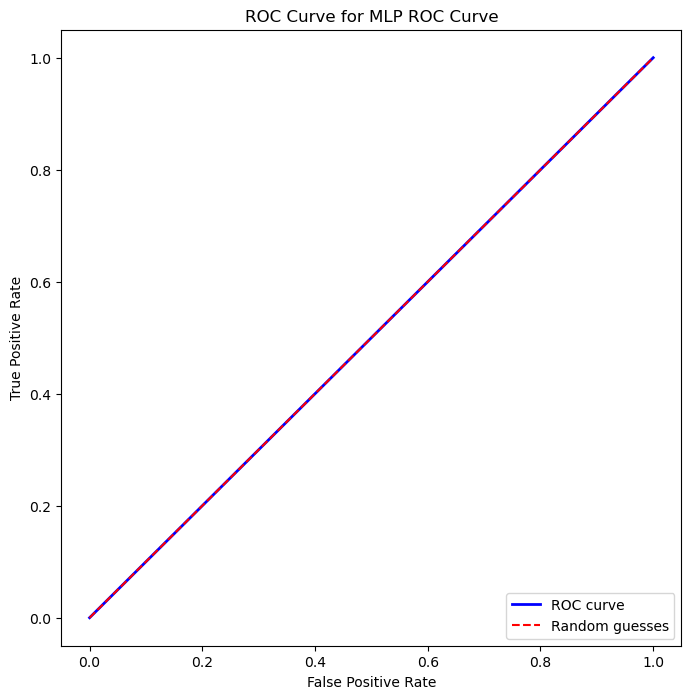

MLP AUC-ROC: 0.5


In [84]:
fpr_mlp, tpr_mlp = roc_curve(y_validation, mlp, X_validation, plot=True, model_name='MLP ROC Curve')
mlp_auc_roc = auc_roc(fpr_mlp, tpr_mlp)
print(f"MLP AUC-ROC: {mlp_auc_roc}")

En este gráfico se puede observar que la ROC correspondiente a nuestro modelo es igual al de un modelo que realiza predicciones arbitrarias. Esto se debe a que el $TP$ rate es $0$, sin importar el threshold. 

### Pruebo con un Árbol antes de hacer el Random Forest

In [54]:
dec_tree = DecisionTree(min_samples_leaf=2, max_depth=5, min_information_gain=0)
dec_tree.fit(X_train.values, y_train)
y_dec_tree_valid_pred = dec_tree.predict(X_validation.values)

TP, TN, FP, FN = confusion_matrix(y_validation, y_dec_tree_valid_pred)

print(f"Confusion Matrix: \n{np.array([[TP, FP], [FN, TN]])}")

Confusion Matrix: 
[[   57    29]
 [   11 45472]]


Estos resultados representan una mejora importante sobre el modelo anterior. Esto significa que el Random Forest debería dar mejores resultados todavía.

### Random Forest

In [88]:
random_forest = RandomForest(n_trees=10, max_depth=5, min_samples_leaf=2, min_information_gain=0)
random_forest.fit(X_train.values, y_train)
y_random_forest_valid_pred = random_forest.predict(X_validation.values)

TP, TN, FP, FN = confusion_matrix(y_validation, y_random_forest_valid_pred)

print(f"Confusion Matrix: \n{np.array([[TP, FP], [FN, TN]])}")

100%|██████████| 10/10 [02:45<00:00, 16.55s/it]


Confusion Matrix: 
[[   57    10]
 [   11 45491]]


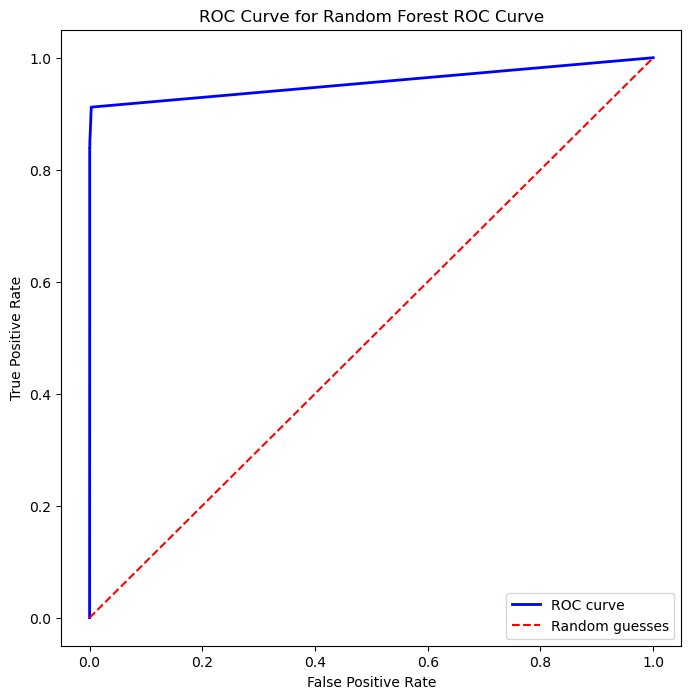

Random Forest AUC-ROC: 0.955561093033508


In [89]:
fpr_rf, tpr_rf = roc_curve(y_validation, random_forest, X_validation, plot=True, model_name='Random Forest ROC Curve')
rf_auc_roc = auc_roc(fpr_rf, tpr_rf)
print(f"Random Forest AUC-ROC: {rf_auc_roc}")

Estos resultados ya presentan un buen modelo predictivo, sin embargo, dado el desbalance entre las clases sospecho que estos resultados deberían mejorar aún mas al emplear técnicas de re-balanceo.

## (b)
Volver a entrenar ambos modelos (red neuronal y bosque aleatorio), aplicando cada una de las siguientes técnicas de re-balanceo. Para cada modelo, y cada tecnica de re-balanceo, reportar las métricas de performance mencionadas en el inciso anterior.

 - Undersampling: eliminar muestras de la clase mayoritaria de manera aleatoria hasta que ambas clases tengan igual proporción.

 - Oversampling by duplication: duplicar muestras de la clase minoritaria de manera aleatoria, hasta que que ambas clases tengan igual proporción.

 - Cost re-weighting: en la función de costo, multiplicar los terminos que dependen de las muestras de la clase minoritaria por un factor $C = \frac{\pi _2} {\pi _1}$
 - SMOTE (Synthetic Minority Oversampling Technique): hasta que ambas clases tengan igual proporción.
 - Opcional: Explorar distintas configuraciones de red neuronal (diferente nu ́mero de capas, unidades ocultas, optimizador, learning rate, batch size) y/o del bosque aleatorio y reportar cual cree que es “el mejor”.

### Undersampling

In [94]:
# undersample the train set
X_train_undersampled, y_train_undersampled = undersample(X_train, y_train)

# count values of each class in the train ser
unique, counts = np.unique(y_train_undersampled, return_counts=True)
print("y_train_undersampled class count: ", dict(zip(unique, counts)))

y_train_undersampled class count:  {0: 320, 1: 320}


In [95]:
random_forest_u = RandomForest(n_trees=10, max_depth=5, min_samples_leaf=2, min_information_gain=0)
random_forest_u.fit(X_train_undersampled, y_train_undersampled)
y_random_forest_u_valid_pred = random_forest_u.predict(X_validation.values)

TP, TN, FP, FN = confusion_matrix(y_validation, y_random_forest_u_valid_pred)

print(f"Confusion Matrix: \n{np.array([[TP, FP], [FN, TN]])}")

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:02<00:00,  3.79it/s]


Confusion Matrix: 
[[   61  1019]
 [    7 44482]]


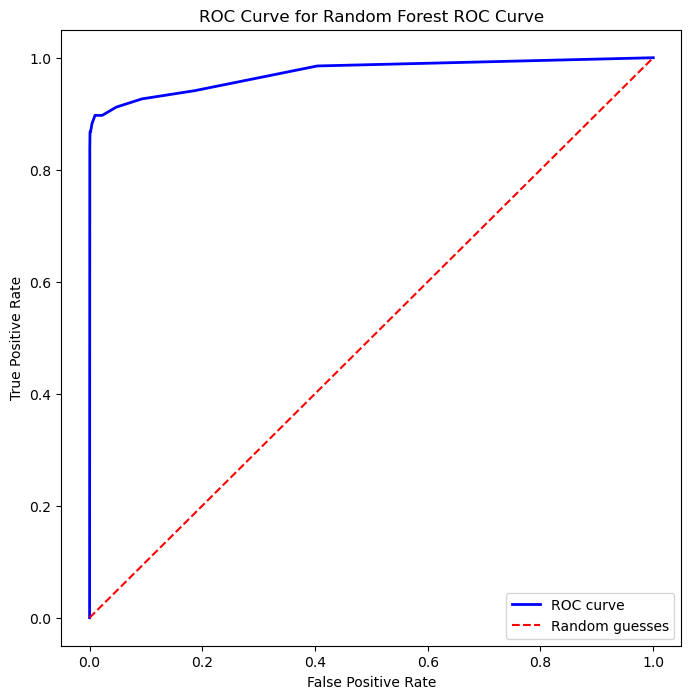

Random Forest with Undersampling AUC-ROC: 0.9727223189664869


In [96]:
fpr_rf_u, tpr_rf_u = roc_curve(y_validation, random_forest_u, X_validation, plot=True, model_name='Random Forest ROC Curve')
rf_u_auc_roc = auc_roc(fpr_rf_u, tpr_rf_u)
print(f"Random Forest with Undersampling AUC-ROC: {rf_u_auc_roc}")

En este caso el resultado de la AUC-ROC es $0.97$, lo cual implica una mejora respecto al mismo modelo implementado al dataset original. Esto es una sorpresa ya que al eliminar muestras de la clase mayoritaria hasta tener la misma cantidad en ambas clases, nos quedamos con un dataset de entrenamiento pequeño de solo $640$ datos (que resulta todavía mas chico al compararlo con el dataset de validación de $45569$ datos). 

En conclusión, en este caso logramos entrenar el modelo con un dataset varios órdenes de magnitud menor en tamaño al original y obtener mejores resultados.

### Oversampling

In [97]:
# oversample the train set
X_train_oversampled, y_train_oversampled = oversample(X_train, y_train)

# count values of each class in the train ser
unique, counts = np.unique(y_train_oversampled, return_counts=True)
print("y_train_oversampled class count: ", dict(zip(unique, counts)))

y_train_oversampled class count:  {0: 181956, 1: 181956}


In [98]:
random_forest_o = RandomForest(n_trees=10, max_depth=5, min_samples_leaf=2, min_information_gain=0)
random_forest_o.fit(X_train_oversampled, y_train_oversampled)
y_random_forest_o_valid_pred = random_forest_o.predict(X_validation.values)

TP, TN, FP, FN = confusion_matrix(y_validation, y_random_forest_o_valid_pred)

print(f"Confusion Matrix: \n{np.array([[TP, FP], [FN, TN]])}")

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [05:32<00:00, 33.26s/it]


Confusion Matrix: 
[[   63  1151]
 [    5 44350]]


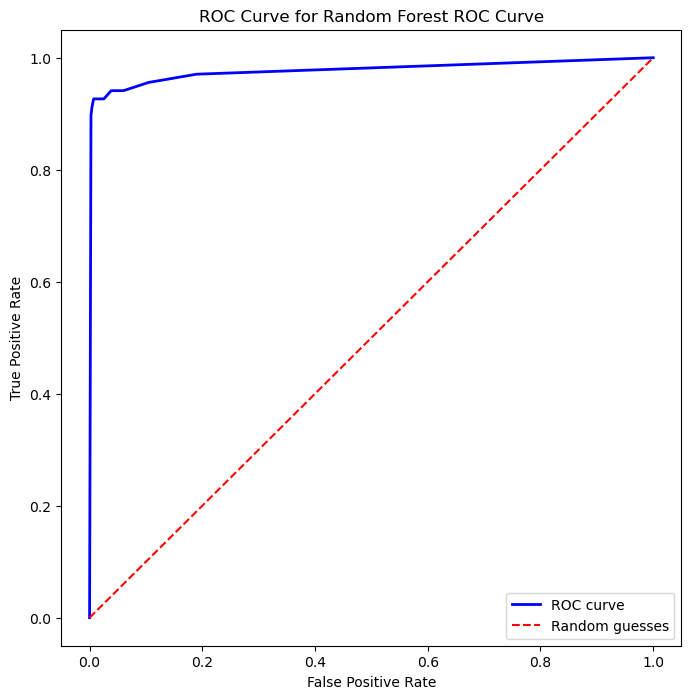

Random Forest with Oversampling AUC-ROC: 0.9774077363522716


In [99]:
fpr_rf_o, tpr_rf_o = roc_curve(y_validation, random_forest_o, X_validation, plot=True, model_name='Random Forest ROC Curve')
rf_o_auc_roc = auc_roc(fpr_rf_o, tpr_rf_o)
print(f"Random Forest with Oversampling AUC-ROC: {rf_o_auc_roc}")

En este caso el resultado es levemente mejor al anterior. De cualquier manera hay que considerar la diferencia en cantidad de recursos empleados para entrenar un modelo y el otro. Al hacer oversampling se está trabajando con un dataset de entrenamiento con mas de $300000$ datos, mientras que el dataset anterior era de solo $320$. 

### Cost re-weighting

In [110]:
C = counts_i[0]/counts_i[1]

random_forest_crw = RandomForest(n_trees=10, max_depth=5, min_samples_leaf=2, min_information_gain=0, C=C)
random_forest_crw.fit(X_train.values, y_train)
y_random_forest_crw_valid_pred = random_forest_crw.predict(X_validation.values)

TP, TN, FP, FN = confusion_matrix(y_validation, y_random_forest_crw_valid_pred)

print(f"Confusion Matrix: \n{np.array([[TP, FP], [FN, TN]])}")

100%|██████████| 10/10 [02:34<00:00, 15.42s/it]


Confusion Matrix: 
[[   63   935]
 [    5 44566]]


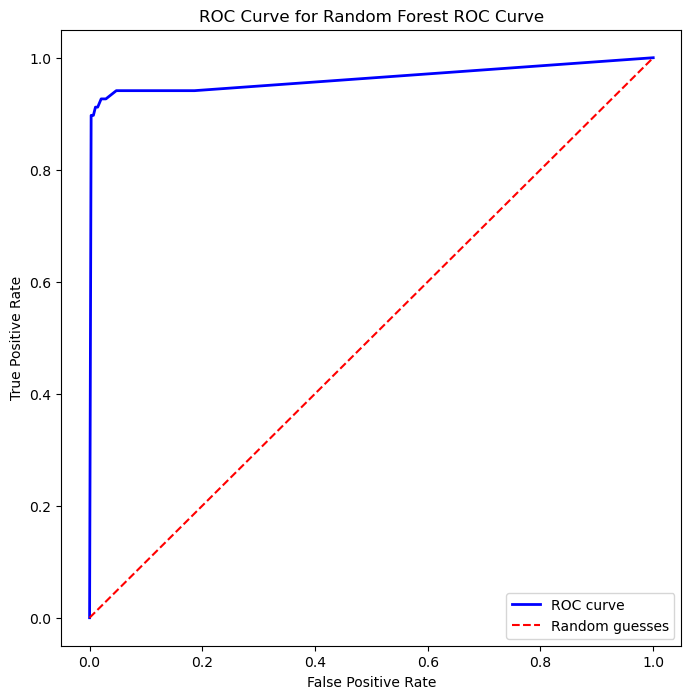

Random Forest with Class Reweighting AUC-ROC: 0.9629364965475873


In [111]:
fpr_rf_crw, tpr_rf_crw = roc_curve(y_validation, random_forest_crw, X_validation, plot=True, model_name='Random Forest ROC Curve')
rf_crw_auc_roc = auc_roc(fpr_rf_crw, tpr_rf_crw)
print(f"Random Forest with Class Reweighting AUC-ROC: {rf_crw_auc_roc}")

El resultado en este caso es bueno pero al rendir por debajo del modelo con undersampling, elegiría esa opción antes, considerando que emplea menos datos de entrenamiento. (En un caso real habría que evaluar en mas profundiad, haciendo cross-validation o por lo menos comparando también los resultados en el test dataset).

### SMOTE

## (c)
Sea un problema de clasifiación binaria, donde el proceso estocástico que genera los datos tiene una distribución a posteriori $P(C_j/x)$ tal que para N suficientemente grande las clases no son linealmente separables en el espacio de features (es decir, las muestras de las dos clases tienen algun grado de solapamiento cuando son proyectadas sobre el espacio de features). Sean $π1 = P(C_1)$ y $π2 = P(C_2)$ las probabilidades marginales de que el proceso genere una muestra de la clase 1 y la clase 2, respectivamente, explicar por qué si utilizamos regresión logística binaria, sin aplicar ninguna técnica de re-balanceo, a medida que $π1$ tiende a 0 y con $N$ suficientemente grande, el accuracy tiende a 1 mientras que el precision tiende a 0.

NOTA: Este resultado es general, y aplica a cualquier clasificador “no-sezgado” (como los que vimos en clase), no solamente a regresión log ́ıstica.
